## **Polynomial Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Creating non-linear dataset to perform polynomial regression

In [ ]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

# 0.5 * X**2 + 1.5*X + 2 : Quadratic equation (ax^2 + bx + c)
# np.random.randn(100, 1) : Outlier

Text(0, 0.5, 'y dataset')

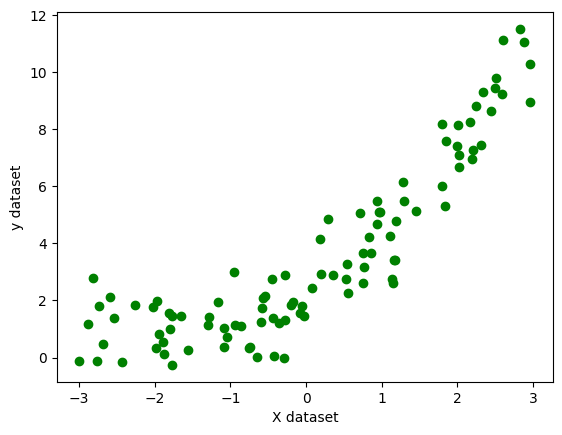

In [ ]:
plt.scatter(X, y, color = 'g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')

#### Splitting the dataset into train and test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1. Performing Simple Linear Regression on the non-linear data

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

LinearRegression()

#### **<span style="color:red;">Note:</span>** No need to perform standardization as the data is already in basic scale.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, regression.predict(X_test))
score

0.7644927108522621

#### <span style="color:red;">Obs:</span> The model gives less accuracy with Simple Linear Regression.

Text(0, 0.5, 'y')

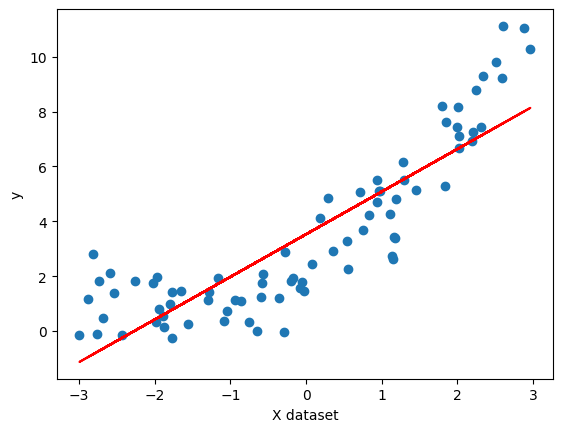

In [ ]:
# visualize the model
plt.plot(X_train, regression.predict(X_train), color = 'r')

plt.scatter(X_train, y_train)
plt.xlabel('X dataset')
plt.ylabel('y')

#### <span style="color:red;">Obs:</span> The above best fit line will give more error.

#### 2. Performing Polynomial Regression on the non-linear data (to solve the above error)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

- For degree = 2

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = True)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly

array([[ 1.00000000e+00,  9.59355829e-01,  9.20363606e-01],
       [ 1.00000000e+00,  2.19679407e+00,  4.82590420e+00],
       [ 1.00000000e+00,  2.58707322e+00,  6.69294783e+00],
       [ 1.00000000e+00, -5.78079378e-01,  3.34175768e-01],
       [ 1.00000000e+00, -1.92682880e-01,  3.71266923e-02],
       [ 1.00000000e+00,  1.29043401e+00,  1.66521993e+00],
       [ 1.00000000e+00,  2.96457475e+00,  8.78870347e+00],
       [ 1.00000000e+00,  5.39552247e-01,  2.91116627e-01],
       [ 1.00000000e+00,  7.57822943e-01,  5.74295614e-01],
       [ 1.00000000e+00, -1.96418451e+00,  3.85802080e+00],
       [ 1.00000000e+00, -1.29241444e+00,  1.67033508e+00],
       [ 1.00000000e+00,  2.50684158e+00,  6.28425470e+00],
       [ 1.00000000e+00, -3.59583582e-01,  1.29300352e-01],
       [ 1.00000000e+00,  2.90472811e-01,  8.43744538e-02],
       [ 1.00000000e+00, -2.81695708e+00,  7.93524718e+00],
       [ 1.00000000e+00,  1.11319976e+00,  1.23921371e+00],
       [ 1.00000000e+00,  1.79990176e-01

In [ ]:
# 1.00000000e+00 - 1 (bias)  ,    9.59355829e-01 - x1    ,    9.20363606e-01 - x1^2

In [ ]:
X_test_poly

array([[ 1.        , -0.73613933,  0.54190111],
       [ 1.        ,  2.95921412,  8.75694819],
       [ 1.        , -0.28434964,  0.08085472],
       [ 1.        , -1.08465307,  1.17647229],
       [ 1.        ,  0.75059836,  0.5633979 ],
       [ 1.        ,  1.7952069 ,  3.22276781],
       [ 1.        , -0.45024324,  0.20271898],
       [ 1.        ,  2.50105419,  6.25527205],
       [ 1.        ,  2.1651621 ,  4.68792691],
       [ 1.        , -0.54650913,  0.29867223],
       [ 1.        , -0.4176437 ,  0.17442626],
       [ 1.        ,  0.52573647,  0.27639884],
       [ 1.        ,  2.44755289,  5.99051514],
       [ 1.        , -0.43160089,  0.18627933],
       [ 1.        ,  0.76984342,  0.5926589 ],
       [ 1.        , -1.80499578,  3.25800978],
       [ 1.        ,  0.85293702,  0.72750155],
       [ 1.        ,  0.19231897,  0.03698659],
       [ 1.        ,  2.83121127,  8.01575725],
       [ 1.        , -0.94568319,  0.8943167 ]])

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test_poly)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, y_pred)
score

0.9211205196704747

#### <span style="color:red;">Obs:</span> The model gives more accuracy with Polynomial Regression.

In [ ]:
regression.coef_

array([[0.        , 1.6295343 , 0.45561435]])

In [ ]:
regression.intercept_

array([2.22789503])

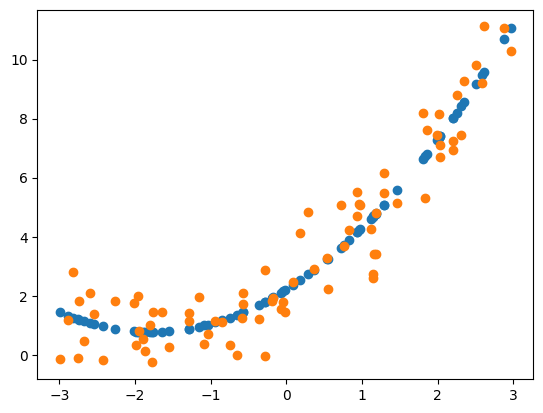

In [ ]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

#### <span style="color:red;">Obs:</span>
- Orange - All the data points
- Blue - Best fit line

- For degree = 3

In [70]:
poly1 = PolynomialFeatures(degree = 3, include_bias = True)

In [79]:
X_train_poly1 = poly1.fit_transform(X_train)
X_test_poly1 = poly1.transform(X_test)

In [80]:
X_train_poly1

array([[ 1.00000000e+00,  9.59355829e-01,  9.20363606e-01,
         8.82956190e-01],
       [ 1.00000000e+00,  2.19679407e+00,  4.82590420e+00,
         1.06015178e+01],
       [ 1.00000000e+00,  2.58707322e+00,  6.69294783e+00,
         1.73151461e+01],
       [ 1.00000000e+00, -5.78079378e-01,  3.34175768e-01,
        -1.93180120e-01],
       [ 1.00000000e+00, -1.92682880e-01,  3.71266923e-02,
        -7.15367801e-03],
       [ 1.00000000e+00,  1.29043401e+00,  1.66521993e+00,
         2.14885643e+00],
       [ 1.00000000e+00,  2.96457475e+00,  8.78870347e+00,
         2.60547684e+01],
       [ 1.00000000e+00,  5.39552247e-01,  2.91116627e-01,
         1.57072630e-01],
       [ 1.00000000e+00,  7.57822943e-01,  5.74295614e-01,
         4.35214392e-01],
       [ 1.00000000e+00, -1.96418451e+00,  3.85802080e+00,
        -7.57786470e+00],
       [ 1.00000000e+00, -1.29241444e+00,  1.67033508e+00,
        -2.15876517e+00],
       [ 1.00000000e+00,  2.50684158e+00,  6.28425470e+00,
      

In [ ]:
# 1.00000000e+00 - 1 (bias)   ,   9.59355829e-01  - x1 ,  9.20363606e-01  - x1^2  ,  8.82956190e-01 - x1^3

In [73]:
regression1 = LinearRegression()

In [74]:
regression1.fit(X_train_poly1, y_train)

LinearRegression()

In [75]:
y_pred1 = regression.predict(X_test_poly1)

In [76]:
from sklearn.metrics import r2_score

In [78]:
score1 = r2_score(y_test, y_pred1)
score1

0.9211618123993404

#### <span style="color:red;">Obs:</span> The accuracy is almost same as degree = 2. There is just a minute difference.

#### Prediction for new dataset

In [85]:
# new data
X_new = np.linspace(-3, 3, 200).reshape(200,1)

In [87]:
X_new_poly = poly.transform(X_new)
X_new_poly    # 4 features because the degree = 3

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

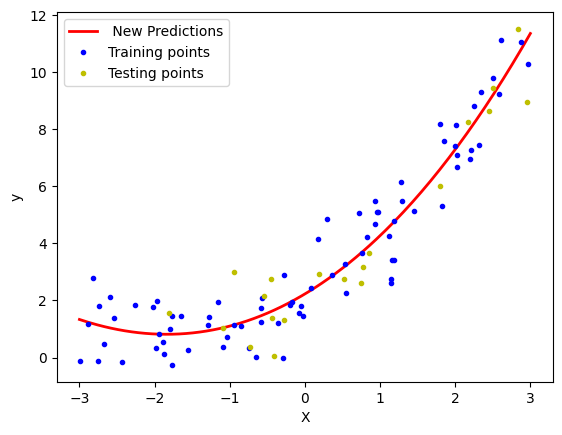

In [95]:
y_new = regression.predict(X_new_poly)

plt.plot(X_new, y_new, 'r-', linewidth = 2, label = ' New Predictions')

plt.plot(X_train, y_train, 'b.', label = 'Training points')
plt.plot(X_test, y_test, 'y.', label = 'Testing points')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## **Polynomial Regression Pipeline**

In [96]:
from sklearn.pipeline import Pipeline

In [105]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200,1)

    poly_features = PolynomialFeatures(degree = degree, include_bias = True)

    lin_reg = LinearRegression()

    poly_regression = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
        ])

    poly_regression.fit(X_train, y_train)

    y_pred_new = poly_regression.predict(X_new)


    # plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label = "Degree " + str(degree), linewidth = 2)

    plt.plot(X_train, y_train, 'b.', linewidth = 3)
    plt.plot(X_test, y_test, 'y.', linewidth = 3)

    plt.legend(loc = 'upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()

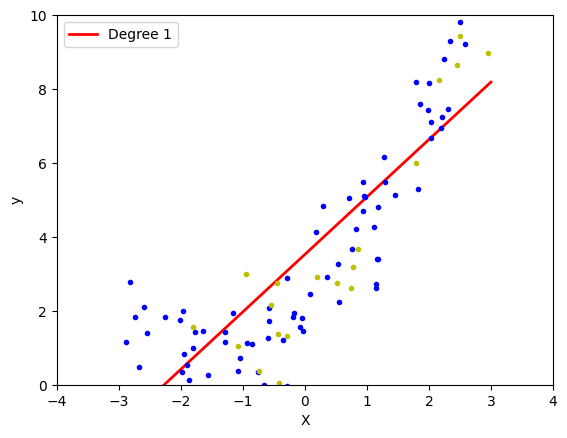

In [106]:
poly_regression(1)

#### <span style="color:red;">Obs:</span>
The error is high with degree = 1

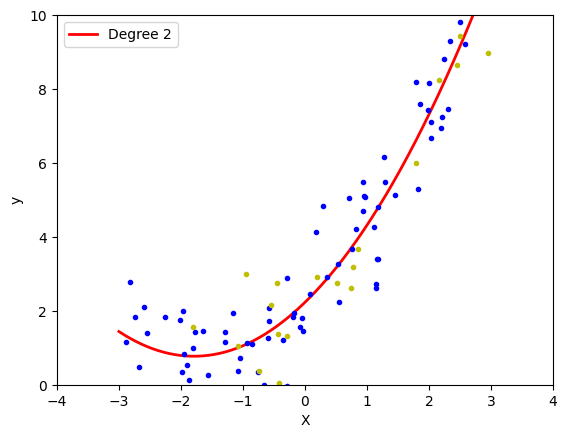

In [107]:
poly_regression(2)

#### <span style="color:red;">Obs:</span>
The error has been reduced as compared to degree = 1

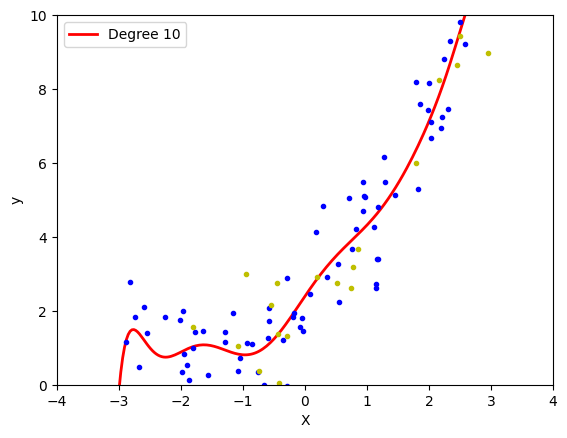

In [109]:
poly_regression(10)

#### <span style="color:red;">Obs:</span>
The model starts overfitting.

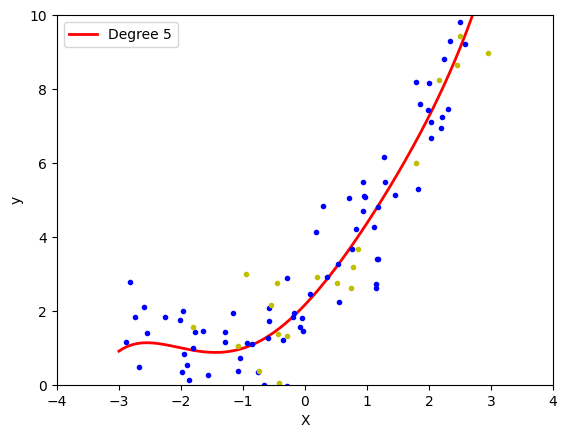

In [115]:
poly_regression(5)

#### <span style="color:red;">Obs:</span>
We can use degree = 5 as the model is not much overfitting.